In [2]:
import scipy.io
import numpy as np

# Carregar dades des del fitxer .mat 
mat = scipy.io.loadmat(r"C:\Users\joana\Documents\Projectes personals\TR\matlab\matlab\emnist-letters.mat")

# Accedir a les dades
X_letters_train = mat['dataset']['train'][0,0]['images'][0,0]
y_letters_train = mat['dataset']['train'][0,0]['labels'][0,0]
X_letters_test = mat['dataset']['test'][0,0]['images'][0,0]
y_letters_test = mat['dataset']['test'][0,0]['labels'][0,0]

# Reformatar
X_letters_train = X_letters_train.reshape((-1, 28, 28), order='F').astype(np.uint8)
X_letters_test = X_letters_test.reshape((-1, 28, 28), order='F').astype(np.uint8)
y_letters_train = y_letters_train.flatten() - 1  # Canviar de 1-26 a 0-25
y_letters_test = y_letters_test.flatten() - 1

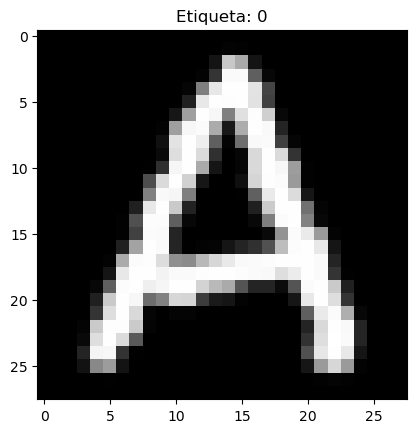

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_letters_train[32], cmap='gray')
plt.title(f"Etiqueta: {y_letters_train[32]}")
plt.show()

In [4]:
mat_digits = scipy.io.loadmat(r"C:\Users\joana\Documents\Projectes personals\TR\matlab\matlab\emnist-digits.mat")

# Dades d'entrenament
X_digits_train = mat_digits['dataset']['train'][0,0]['images'][0,0]
y_digits_train = mat_digits['dataset']['train'][0,0]['labels'][0,0]

# Dades de test
X_digits_test = mat_digits['dataset']['test'][0,0]['images'][0,0]
y_digits_test = mat_digits['dataset']['test'][0,0]['labels'][0,0]

In [5]:
# Format de les imatges (vector --> matriu 28x28)
X_digits_train = X_digits_train.reshape(-1, 28, 28, order='F').astype(np.uint8)
X_digits_test = X_digits_test.reshape(-1, 28, 28, order='F').astype(np.uint8)

# Ajusta etiquetes: els dígits van del 0 al 9, no cal restar 1
y_digits_train = y_digits_train.flatten()
y_digits_test = y_digits_test.flatten()

# Reassignar etiquetes dels dígits perquè no se solapin amb les lletres
y_digits_train += 26
y_digits_test += 26

In [6]:
# Unim els conjunts d'entrenament
X_train_total = np.concatenate([X_letters_train, X_digits_train], axis=0)
y_train_total = np.concatenate([y_letters_train, y_digits_train], axis=0)

# I els conjunts de test
X_test_total = np.concatenate([X_letters_test, X_digits_test], axis=0)
y_test_total = np.concatenate([y_letters_test, y_digits_test], axis=0)

# Normalització: valors entre 0 i 1
X_train_total = X_train_total / 255.0
X_test_total = X_test_total / 255.0

# Afegim canal (blanc i negre = 1 canal)
X_train_total = X_train_total.reshape(-1, 28, 28, 1)
X_test_total = X_test_total.reshape(-1, 28, 28, 1)

In [7]:
from sklearn.preprocessing import OneHotEncoder

# Inicialitzem l'encodificador
encoder = OneHotEncoder(sparse_output=False, categories='auto')

# Ajustem i transformem les etiquetes (cal reshaping per a columnes)
y_train_cat_letters = encoder.fit_transform(y_letters_train.reshape(-1, 1))
y_test_cat_letters = encoder.transform(y_letters_test.reshape(-1, 1))

print("Etiqueta original:", y_letters_train[2])
print("One-hot encoded:", y_train_cat_letters[2])

Etiqueta original: 15
One-hot encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore

# Defineixo la CNN
model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Redueix overfitting
    Dense(y_train_cat_letters.shape[1], activation='softmax')  # Sortida: tantes neurones com classes
])

# Compilo
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entreno
history_cnn = model_cnn.fit(
    X_letters_train, y_train_cat_letters,
    epochs=10,
    batch_size=128,
    validation_data=(X_letters_test, y_test_cat_letters),
    verbose=1
)

# Avaluació
test_loss, test_acc = model_cnn.evaluate(X_letters_test, y_test_cat_letters, verbose=0)
print(f"Precisió CNN: {test_acc:.4f}")

c:\Users\joana\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.4794 - loss: 1.7625 - val_accuracy: 0.8756 - val_loss: 0.4078
Epoch 2/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.7934 - loss: 0.6492 - val_accuracy: 0.9106 - val_loss: 0.2848
Epoch 3/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8471 - loss: 0.4811 - val_accuracy: 0.9184 - val_loss: 0.2551
Epoch 4/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8722 - loss: 0.4011 - val_accuracy: 0.9227 - val_loss: 0.2454
Epoch 5/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8851 - loss: 0.3575 - val_accuracy: 0.9254 - val_loss: 0.2306
Epoch 6/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8949 - loss: 0.3235 - val_accuracy: 0.9284 - val_loss: 0.2211
Epoch 7/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9026 - loss: 0.2982 - val_accuracy: 0.9289 - val_loss: 0.2226
Epoch 8/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9075 - loss: 0.2832 - 